In [1]:
import pandas as pd
from pykml.factory import KML_ElementMaker as KML
from lxml import etree
import matplotlib.pyplot as plt
import numpy as np
import geopandas

In [2]:
file_name = 'csv/mai.csv'

In [3]:
df = pd.read_csv(filepath_or_buffer=file_name, sep=';')

In [4]:
df.head()

,AHE,Número do cadastro,Número da portaria,Nome do usuário de água,CPF/CNPJ,Natureza da intervenção,Tipo da Fonte de Captação,Tipo de Intervenção,Classificação,Status,...,Nº da licença,Nome do responsável técnico,CPF do responsável técnico,Formação do responsável técnico,Número da ART do responsável técnico,Nome da Geometria,Latitude,Longitude,Latitude (ponto final),Longitude (ponto final)
0,NaN,2020/006.741,-,CONSTRUNÍVEL ENERGIAS RENOVÁVEIS LTDA,16.456.838/0001-24,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Reserva de disponibilidade hídrica,Aguardando pagamento da guia,...,-,Marcos Coradi Favero,068.835.179-44,Engenharia Civil,-,Ponto central do barramento,"-51,2448983","-27,80993714",-,-
1,Ferradura,2020/005.099,O-000.870/2020,BT GERADORA DE ENERGIA ELETRICA S.A.,03.149.173/0001-64,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Outorga,Concedida,...,-,Karl Rischbieter,003.791.409-00,Engenharia Elétrica,2102702-0,Ponto 1,"-53,5789","-27,5612",-,-
2,NaN,2020/002.866,-,LINHA ONZE OESTE ENERGIA LTDA,27.059.624/0001-30,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,Aguardando formalização de documentos,...,-,Daniel Zonta,008.515.139-48,Engenharia Civil,-,Ponto 1,"-54,00455002","-28,35111244",-,-
3,NaN,2020/002.683,-,Cooperativa de Geração de Energia e Desenvolvi...,08.290.060/0001-06,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,Aguardando formalização de documentos,...,-,Karl Rischbieter,003.791.409-00,Engenharia Elétrica,9335010033,Ponto 1,"-53,97013076","-27,96124919",-,-
4,NaN,2020/001.754,-,BORTOLON AGROCOMERCIAL EIRELI,00.376.956/0001-92,Água Superficial,Barragem de acumulação,Cadastro apenas da barragem,Cadastro,Aguardando análise,...,-,Edesio Alvaro Bortolon,385.825.890-34,Engenharia Civil,8967823,Ponto 1,"-50,85597014","-28,29908214",-,-


In [5]:
#filtro_intervencao = df['Tipo de Intervenção'] == 'Cadastro apenas da barragem'
filtro_status1 = df['Status'] == 'Aguardando análise'
filtro_status2 = df['Status'] == 'Aguardando alterações de dados inconsistentes'
filtro_status3 = df['Status'] == 'Concedida'
filtro_status4 = df['Status'] == 'Indeferida'
filtro_status5 = df['Status'] == 'Em análise'

In [6]:
u_status = ['Concedida', 'Indeferida', 'Em análise', 'Aguardando análise', 'Aguardando alterações de dados inconsistentes']

In [7]:
df = df[filtro_status1 | filtro_status2 | filtro_status3 | filtro_status4 | filtro_status5]

In [8]:
df.shape

(81, 55)

In [9]:
shp_path = "estados_2010.shp"

In [10]:
estados = geopandas.read_file(shp_path)

In [11]:
pie_dict = {}
for s in u_status:
    ns = sum(df['Status'] == s)
    pie_dict[s] = ns

In [12]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

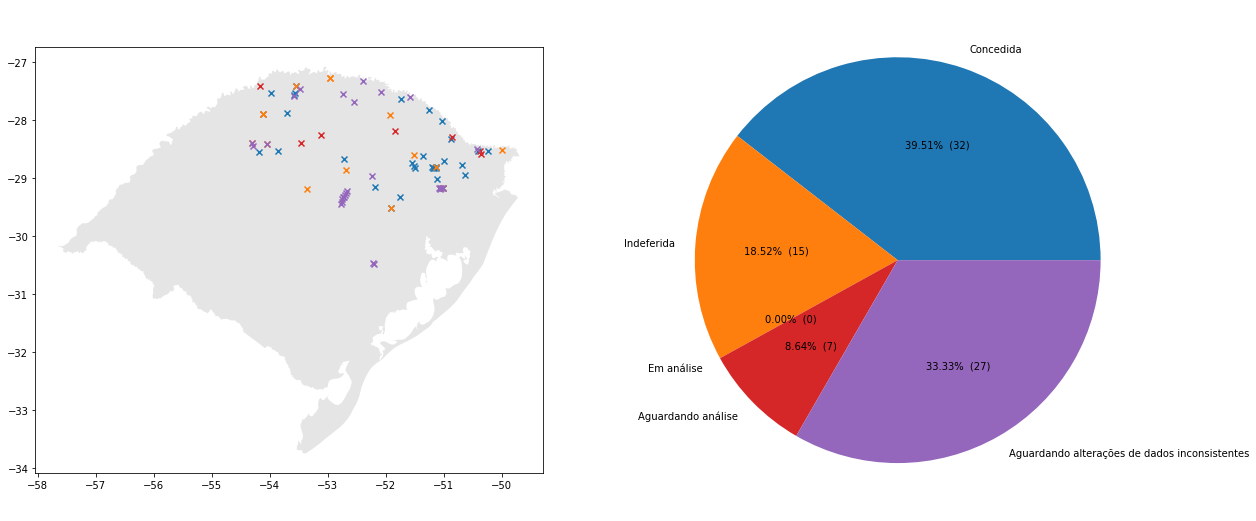

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,15))
ax2.pie(pie_dict.values(), autopct=make_autopct(pie_dict.values()), labels=pie_dict.keys())
#plot_shape(22, ax1, sf)
estados[estados['sigla'] == 'RS'].plot(color='gray', ax=ax1, alpha=0.2)
#bacias.plot(edgecolor='black', color='gray', ax=ax1, alpha=0.1)
for s in u_status:
    f = df['Status'] == s
    x, y = df[f]['Latitude'].values, df[f]['Longitude'].values
    x, y = [float(i.replace(',','.')) for i in x], [float(i.replace(',','.')) for i in y]
    ax1.scatter(x, y, label = s, marker='x')
ax1.axis('scaled')
#fig.suptitle('Processos em janeiro - Total {}'.format(df.shape[0]))
#ax2.legend(loc='upper right')
plt.savefig('05_Status_mai', bbox_inches='tight')